<a href="https://colab.research.google.com/github/gao42/PyProjects/blob/main/train_lenet_geo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train the Geometry Classification Model (LeNet Model).
#####     Usage:
#####     python train_model.py --dataset dataset --model output/lenet.hdf5

In [1]:
# Tools: Unzip the pyimagesearch tools

!unzip -qq "/content/pyimagesearch.zip" -d "/content"


In [3]:
# Import: import the necessary packages.
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import SGD
from pyimagesearch.nn.conv import LeNet
from pyimagesearch.utils.captchahelper import preprocess
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [4]:
# Arguments: construct the argument parse and parse the arguments.

#ap = argparse.ArgumentParser()
#ap.add_argument("-d", "--dataset", required=True,
#	help="path to input dataset")
#ap.add_argument("-m", "--model", required=True,
#	help="path to output model")
#args = vars(ap.parse_args())

args = {
	  "dataset": "dataset_geo",
    "model": "lenet_geo.hdf5"
}

In [5]:
# Data: Unzip the data set to be used

!unzip -qq "/content/dataset_geo.zip" -d "/content"

In [6]:
# Preprocess: in a loop load, preprocess scale each image.

data = []
labels = []

for imagePath in paths.list_images(args["dataset"]):
	# load the image, pre-process it, and store it in the data list
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	#image = preprocess(image, 28, 28)
	image = preprocess(image, 512, 512)
	image = img_to_array(image)
	data.append(image)

	# extract the class label from the image path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [7]:
# Preprocess: split and transform the dataset.

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

# convert the labels from integers to vectors
lb = LabelBinarizer().fit(trainY)
trainY = lb.transform(trainY)
testY = lb.transform(testY)

In [8]:
# Initialize: initialize the model

print("[INFO] compiling model...")
#model = LeNet.build(width=28, height=28, depth=1, classes=9)
model = LeNet.build(width=512, height=512, depth=1, classes=12)
opt = SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


In [9]:
# Train: train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY,  validation_data=(testX, testY),
	batch_size=32, epochs=30, verbose=1)

[INFO] training network...
Epoch 1/30
18/18 [==============================] - 15s 382ms/step - loss: 2.4945 - accuracy: 0.0859 - val_loss: 2.4736 - val_accuracy: 0.0929
Epoch 2/30
18/18 [==============================] - 4s 240ms/step - loss: 2.4609 - accuracy: 0.0987 - val_loss: 2.4928 - val_accuracy: 0.1038
Epoch 3/30
18/18 [==============================] - 5s 255ms/step - loss: 2.4355 - accuracy: 0.1371 - val_loss: 2.4623 - val_accuracy: 0.1311
Epoch 4/30
18/18 [==============================] - 4s 238ms/step - loss: 2.4037 - accuracy: 0.1755 - val_loss: 2.4372 - val_accuracy: 0.1311
Epoch 5/30
18/18 [==============================] - 5s 258ms/step - loss: 2.3583 - accuracy: 0.2139 - val_loss: 2.4611 - val_accuracy: 0.1202
Epoch 6/30
18/18 [==============================] - 4s 239ms/step - loss: 2.2975 - accuracy: 0.2687 - val_loss: 2.4320 - val_accuracy: 0.1366
Epoch 7/30
18/18 [==============================] - 5s 256ms/step - loss: 2.2181 - accuracy: 0.2943 - val_loss: 2.5344 -

In [10]:
# Results: evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
6/6 [==============================] - 0s 70ms/step
              precision    recall  f1-score   support

     ACR-RBD       0.17      1.00      0.29        14
      ACR-SE       0.25      0.12      0.16        17
         CCO       1.00      0.10      0.18        20
         DCO       0.00      0.00      0.00        14
       Deck1       1.00      0.78      0.88         9
     EXP-CMD       1.00      0.92      0.96        13
     F-RB-NY       1.00      0.75      0.86        12
     F-RB-PY       1.00      1.00      1.00        13
       RB-NX       1.00      0.43      0.60        14
       RB-NY       0.83      0.62      0.71        16
       RB-PX       1.00      1.00      1.00        17
       RB-PY       0.85      0.46      0.59        24

    accuracy                           0.56       183
   macro avg       0.76      0.60      0.60       183
weighted avg       0.76      0.56      0.57       183



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Save: save the model to disk
print("[INFO] serializing network...")
model.save(args["model"])

[INFO] serializing network...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


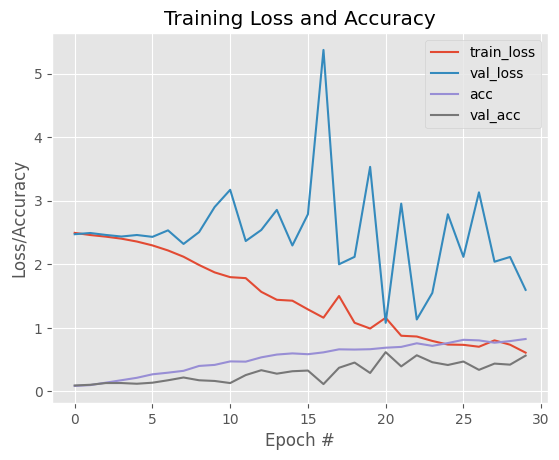

In [11]:
# Results: plot the training + testing loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 30), H.history["accuracy"], label="acc")
plt.plot(np.arange(0, 30), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()